##  Need todo
- cleansing the data by identifying null values and replacing them with an appropriate value (zero in this case).
- creating a model which provides the chances a flight will be delayed by more than 15 minutes for a given day and airport pair.
- saving the model to a file for use in an external application.
- creating a new file with the names and associated ids from the dataset of all airports.

## Import Dataset


In [1]:
# import dataset
import pandas as pd
import numpy as np

# file
data = pd.read_csv('data/flights.csv')

# check the data
print(data.head())

   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0  2013      9          16          1      DL            15304   
1  2013      9          23          1      WN            14122   
2  2013      9           7          6      AS            14747   
3  2013      7          22          1      OO            13930   
4  2013      5          16          4      DL            13931   

              OriginAirportName  OriginCity OriginState  DestAirportID  \
0           Tampa International       Tampa          FL          12478   
1      Pittsburgh International  Pittsburgh          PA          13232   
2  Seattle/Tacoma International     Seattle          WA          11278   
3  Chicago O'Hare International     Chicago          IL          11042   
4         Norfolk International     Norfolk          VA          10397   

                            DestAirportName    DestCity DestState  CRSDepTime  \
0             John F. Kennedy International    New York        NY        1539

## Check Data

In [2]:
# find null values
print(data.isnull().sum())

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


## Clean Data

In [3]:
# change from null to 0
data['DepDel15'].fillna(0, inplace=True)

# check the data
print(data.isnull().sum())

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


## Create the model

In [4]:
# Add at the end of existing code

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Dataset shape: (271940, 20)

Dataset columns: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier', 'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState', 'DestAirportID', 'DestAirportName', 'DestCity', 'DestState', 'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'Cancelled']

Check for remaining null values after previous cleaning:
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Proportion of flights delayed by 15+ minutes:
0.0    0.800908
1.0    0.199092
Name: DepDel15, dtype: float64


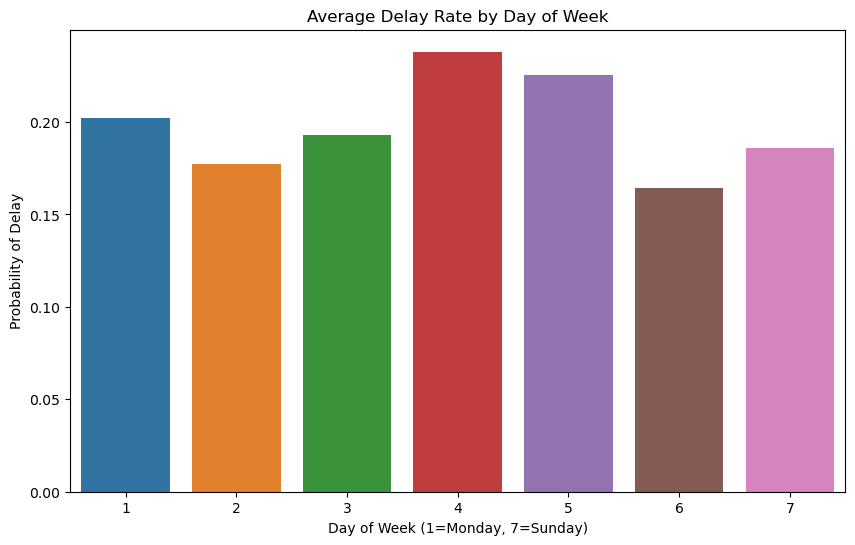

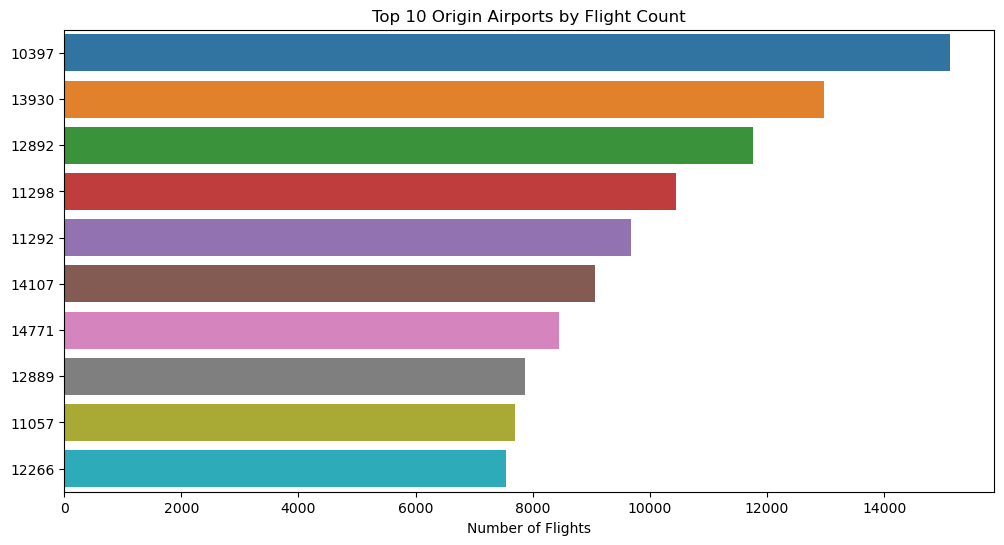

In [6]:
# Exploratory Data Analysis
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns.tolist())
print("\nCheck for remaining null values after previous cleaning:")
print(data.isnull().sum())

# Check the proportion of delayed flights
print("\nProportion of flights delayed by 15+ minutes:")
print(data['DepDel15'].value_counts(normalize=True))

# Explore delay patterns by day of week
plt.figure(figsize=(10, 6))
delay_by_day = data.groupby('DayOfWeek')['DepDel15'].mean()
sns.barplot(x=delay_by_day.index, y=delay_by_day.values)
plt.title('Average Delay Rate by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Probability of Delay')
plt.show()

# Explore the most frequent origin airports
plt.figure(figsize=(12, 6))
top_origins = data['OriginAirportID'].value_counts().head(10)
sns.barplot(x=top_origins.values, y=top_origins.index.astype(str))
plt.title('Top 10 Origin Airports by Flight Count')
plt.xlabel('Number of Flights')
plt.show()

In [ ]:
# Feature Engineering
# Create features for origin-destination pair and day of week

# Let's create a new feature for airport pair
data['AirportPair'] = data['OriginAirportID'].astype(str) + '_' + data['DestAirportID'].astype(str)

# Select features for modeling
X = data[['DayOfWeek', 'AirportPair']]
y = data['DepDel15'].astype(int)  # Ensure target is integer type

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

print(f"Shape of encoded features: {X_encoded.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Shape of encoded features: (271940, 2490)


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_delay_probability(model, encoder, day_of_week, origin_airport_id, dest_airport_id):
    """
    Predicts the probability of a flight being delayed by 15+ minutes
    
    Parameters:
    -----------
    model: The trained model
    encoder: The fitted one-hot encoder
    day_of_week: int (1-7, where 1 is Monday)
    origin_airport_id: str or int representing origin airport ID
    dest_airport_id: str or int representing destination airport ID
    
    Returns:
    --------
    float: Probability of delay (0-1)
    """
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'DayOfWeek': [day_of_week],
        'AirportPair': [f"{origin_airport_id}_{dest_airport_id}"]
    })
    
    # Encode the input
    input_encoded = encoder.transform(input_data)
    
    # Predict probability
    delay_prob = model.predict_proba(input_encoded)[0, 1]
    
    return delay_prob

# Example usage
print("\nExample prediction:")
day = 1  # Monday
origin = 12478  # JFK
destination = 12892  # LAX
prob = predict_delay_probability(model, encoder, day, origin, destination)
print(f"Probability of delay for a flight from JFK to LAX on Monday: {prob:.2f}")

In [ ]:
# Save the model and encoder to files
with open('flight_delay_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('flight_delay_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Create a mapping file for airport IDs to names for reference
airport_mapping = data[['OriginAirportID', 'OriginAirportName']].drop_duplicates()
airport_mapping.columns = ['AirportID', 'AirportName']
airport_mapping.to_csv('data/airport_mapping.csv', index=False)

print("\nModel, encoder, and airport mapping saved to files.")